# The Kolmogorov-Smirnov Test

During data analysis, you have to satisfy a number of assumptions for the underlying dataset. One of the most common assumptions that you will come across is the "Normality Assumption", i.e., the underlying data roughly follows a normal distribution.

## Normality assumption

Formal normality tests always reject the huge sample sizes we work with today. When n (our sample size) gets large, even the smallest deviation from perfect normality will lead to a significant result. And as every dataset has some degree of random noise, no single dataset will be a **perfectly** normally distributed sample. 

> **In applied statistics, the question is not whether the data/residuals are perfectly normal, but normal enough for the assumptions to hold**.

This question is answered through visualization techniques like qqplots, boxplots, or more advanced statistical tests including:

- The Shapiro-Wilk test;
- The Anderson-Darling test, and;
- The Kolmogorov-Smirnov test 

## Kolmogorov-Smirnov Test

A K-S test provides a way of comparing distributions, whether two sample distributions or a sample distribution with a theoretical distribution - comparable to what we've already seen when we learned about one sample or two-sample t-tests. 

The distributions are compared in their cumulative form as **Empirical Cumulative Distribution Functions**. The test statistic in K-S test used to compare distributions is simply the maximum vertical distance between the two functions. Essentially, we are testing the sample data against another sample, to compare their distributions for similarities.

### The Empirical Cumulative Distribution Function (ECDF)

> An empirical cumulative distribution function (CDF) is a non-parametric estimator of the underlying CDF of a random variable. It assigns a probability to each data point, orders the data from smallest to largest in value, and calculates the sum of the assigned probabilities up to and including each data point.

The most intuitive way to think about the empirical distribution function is that it relates to the cumulative distribution function (CDF) in a similar way to how a histogram relates to a probability density function. Let's look at the following figures to get this idea:

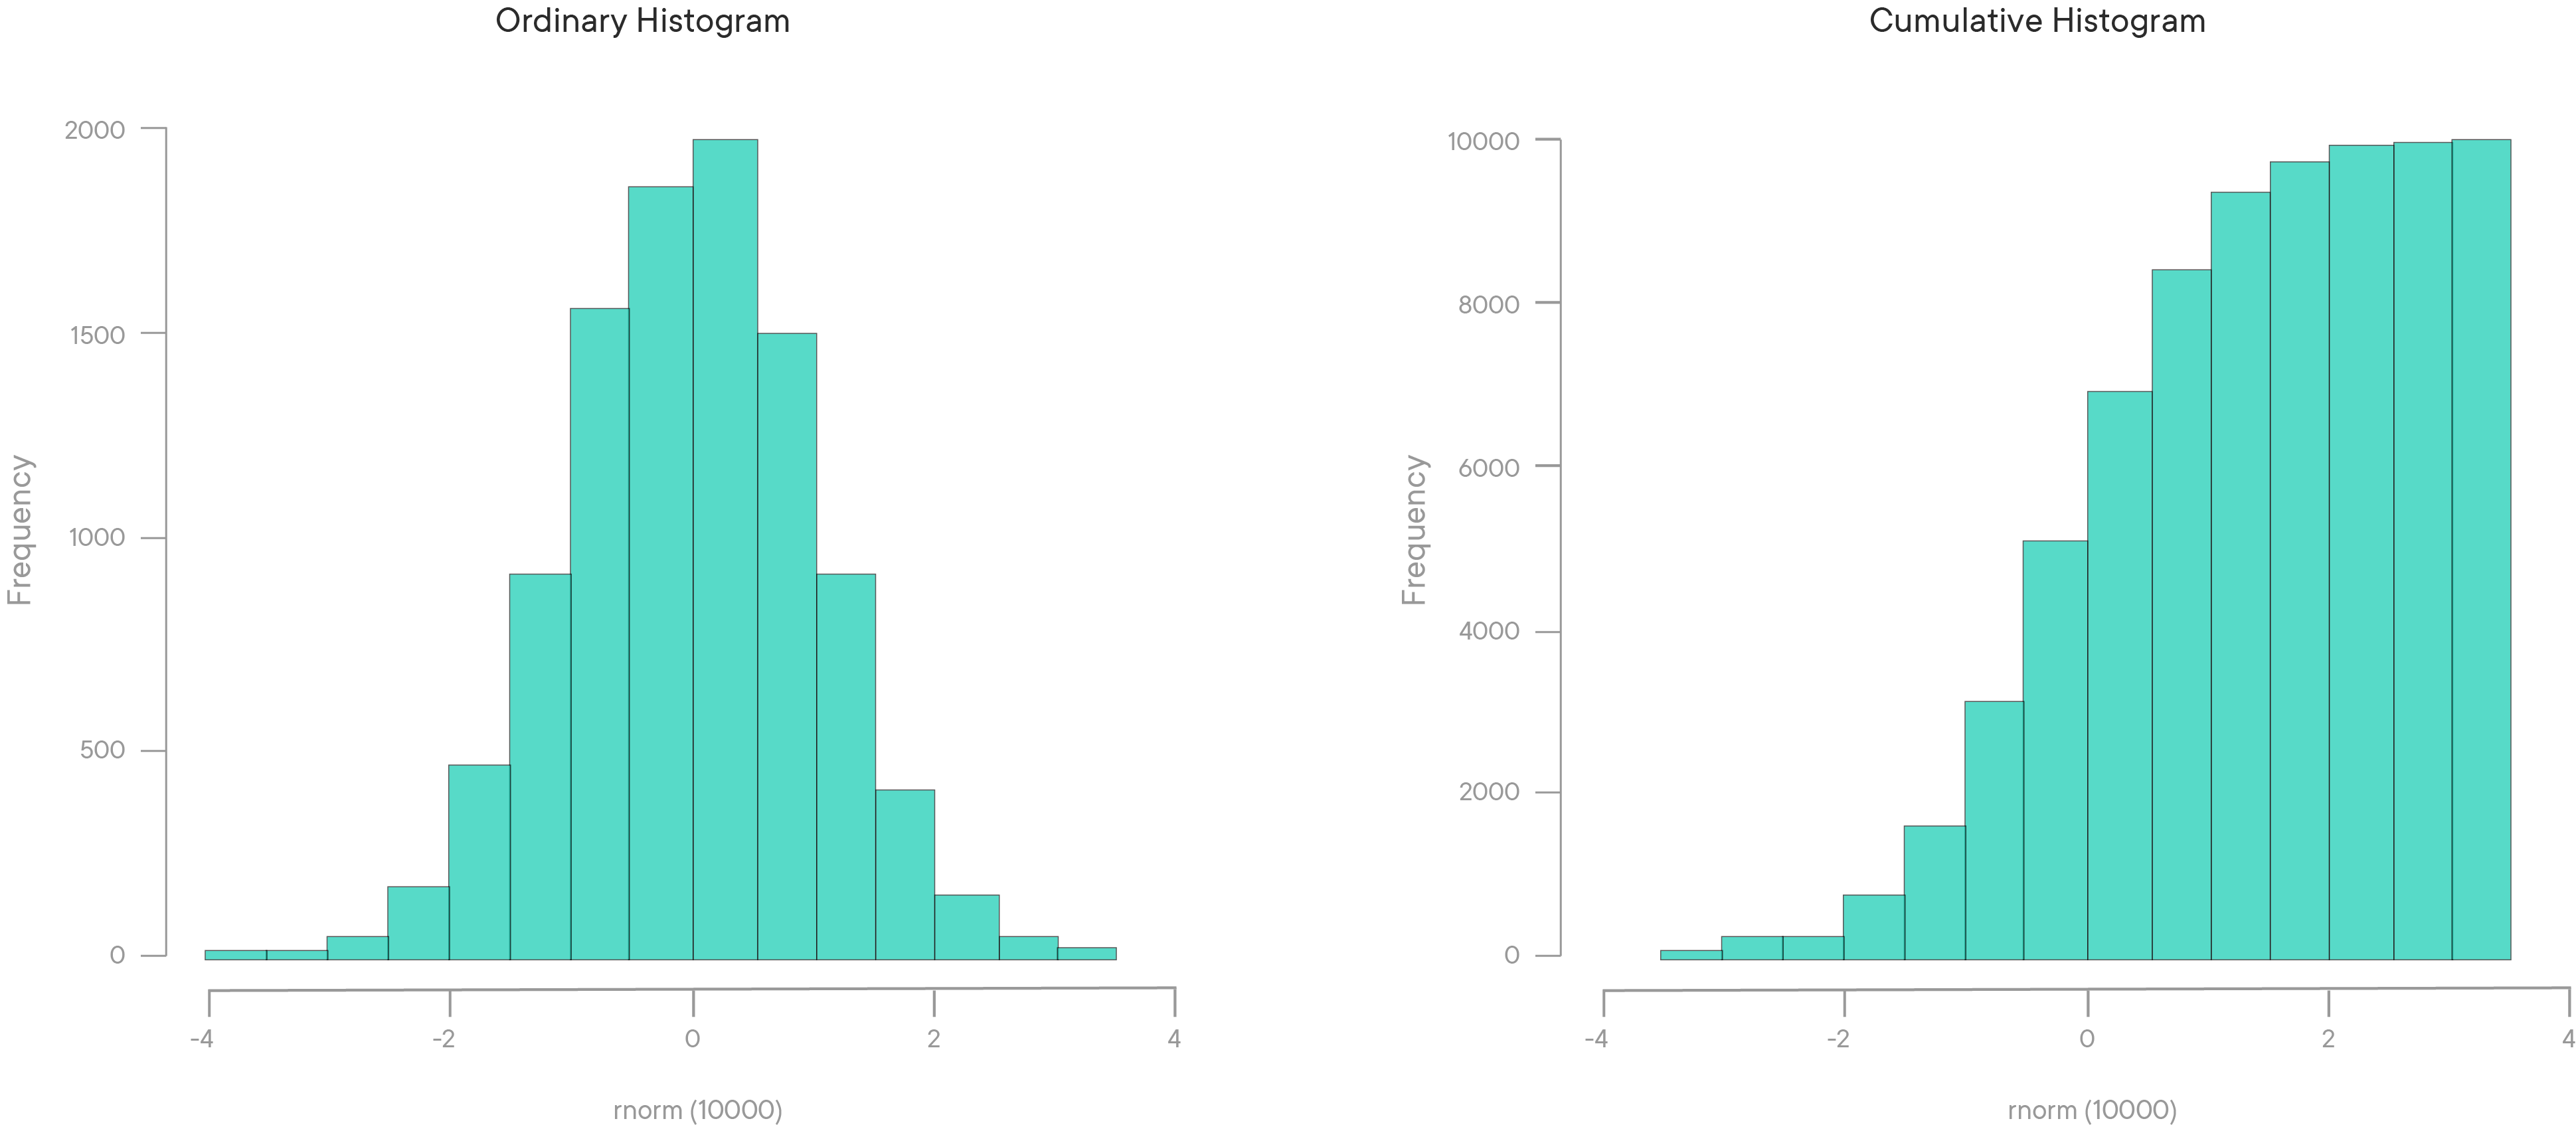


The left figure shows a regular histogram with samples looking like a normal distribution. The right figure shows the same samples except each bin in the histogram contains the cumulative count of samples up to that bin, which approximates the shape of the CDF for this random variable. Now the right figure doesn't exactly represent an empirical distribution function because the Y-axis is not normalized to 1 and the samples are binned instead of just plotted cumulatively. Nonetheless, the idea remains the same. An example of an empirical CDF is given below:

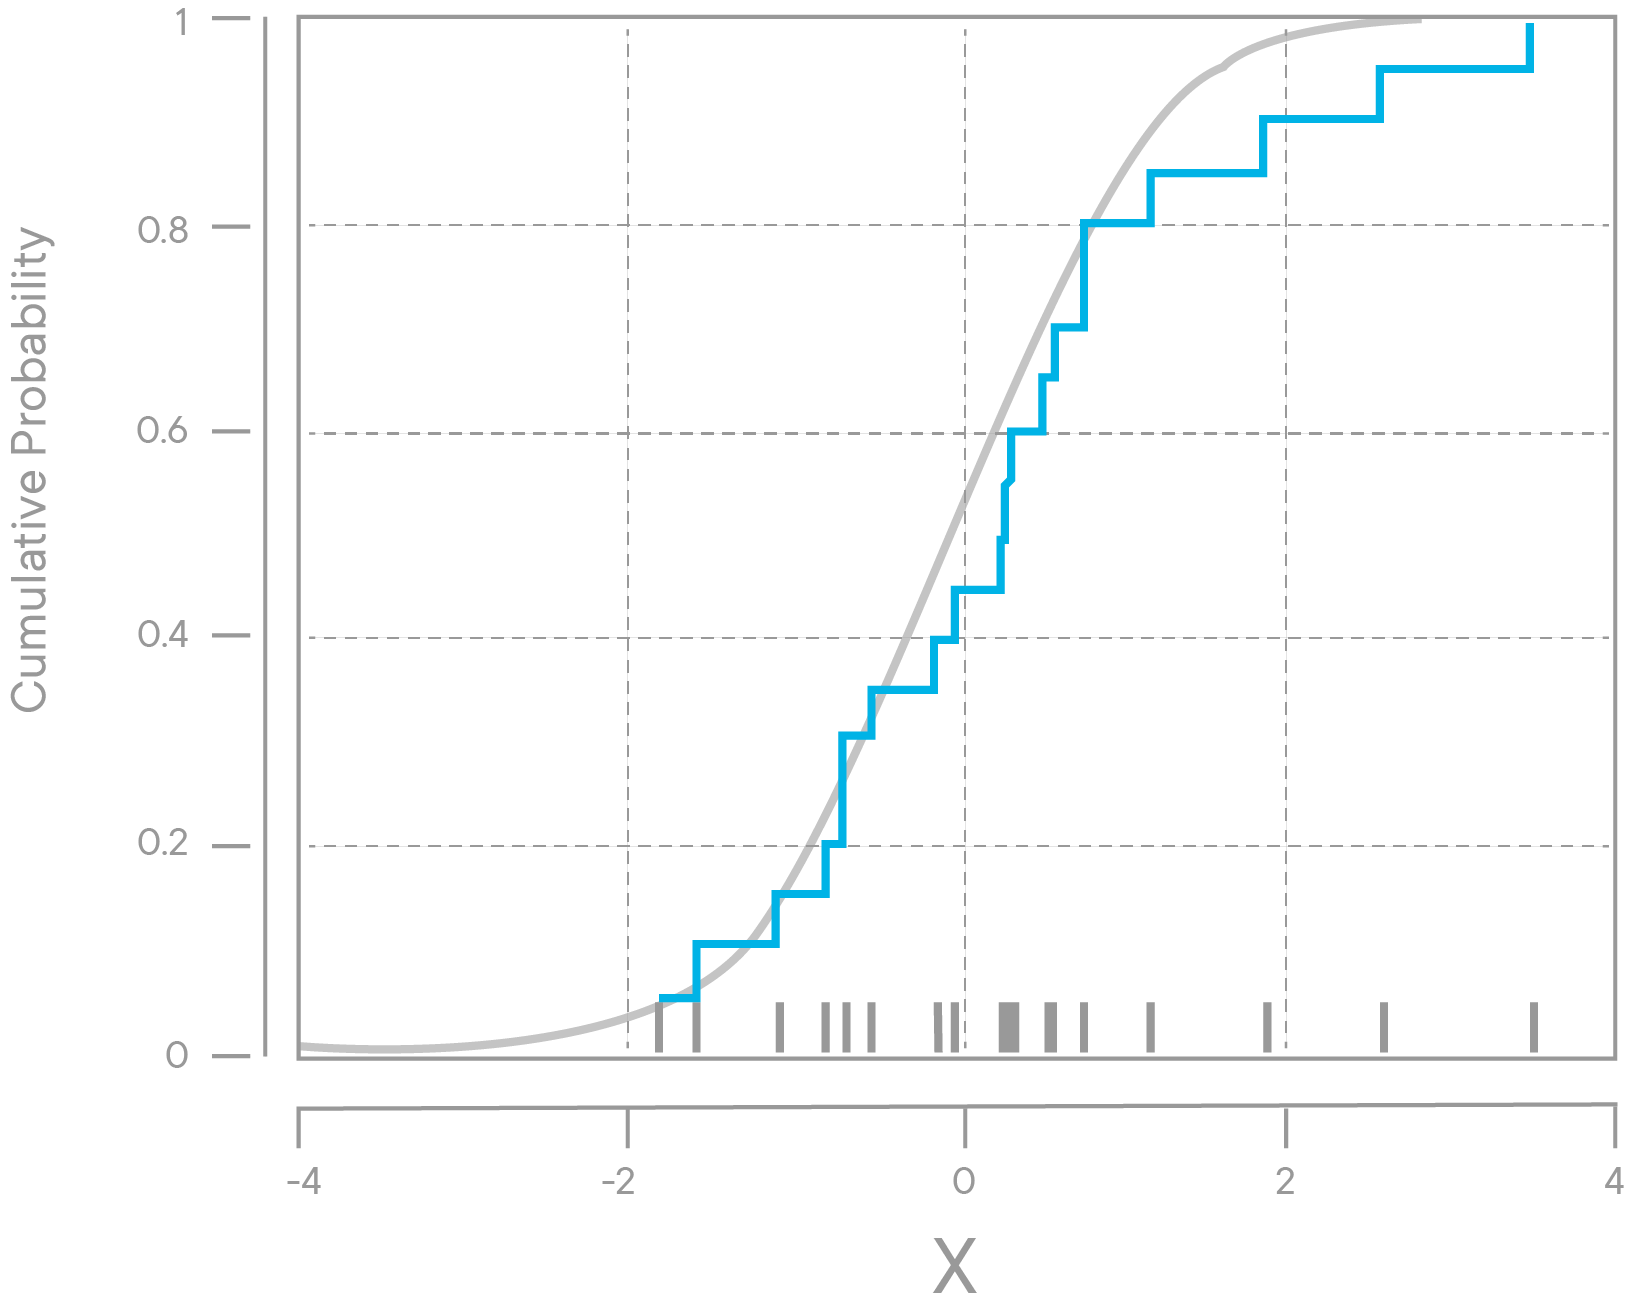


This image sums up the intuition for empirical distribution function. The blue line is our empirical CDF whereas the  grey one is our theoretical CDF (i.e. plotted using parameters and fitting a probability function).

If X is a random variable with CDF $F(x)=P(X≤x)$ , and  $x1,…,xn$ are i.i.d. random variables sampled from  
X . Then, the empirical distribution function,  $F̂(x)$ , is a CDF:



$$\hat{F}(x) = \frac{\text{# of elements in sample} \leq x}{n} = \frac{1}{n} \Sigma_{i=1}^n I(x_i \leq x) \tag{1}$$

## One-Sample K-S test

This is also known as the **Kolmogorov-Smirnov Goodness of Fit test**. It calculates the similarity between an observed (empirical) distribution and a completely specified theoretical continuous distribution. It is sensitive to all attributes of a distribution including mean, variance, and shape.

The key assumption of the one-sample test is that the theoretical distribution is fully defined continuous distribution, in terms of its parameters. This obviously means that its most common use case is that of testing normality. The test statistic, $d$,  is simply the largest deviation between the observed cumulative function and the expected theoretical cumulative frequency distribution, i.e. 

$$
d	   =    	max(abs[F_0(X)-F_r(X)])
$$

where
- **d** is the maximum deviation Kolmogorov statistic 
- **F<sub>0</sub>(X)** = (No.of observations ≤ X)/(Total no.of observations) i.e. the non parametric empirical distribution
- **F<sub>r</sub>(X)** = The theoretical frequency distribution of X - parametric (e.g. based on mean value) 
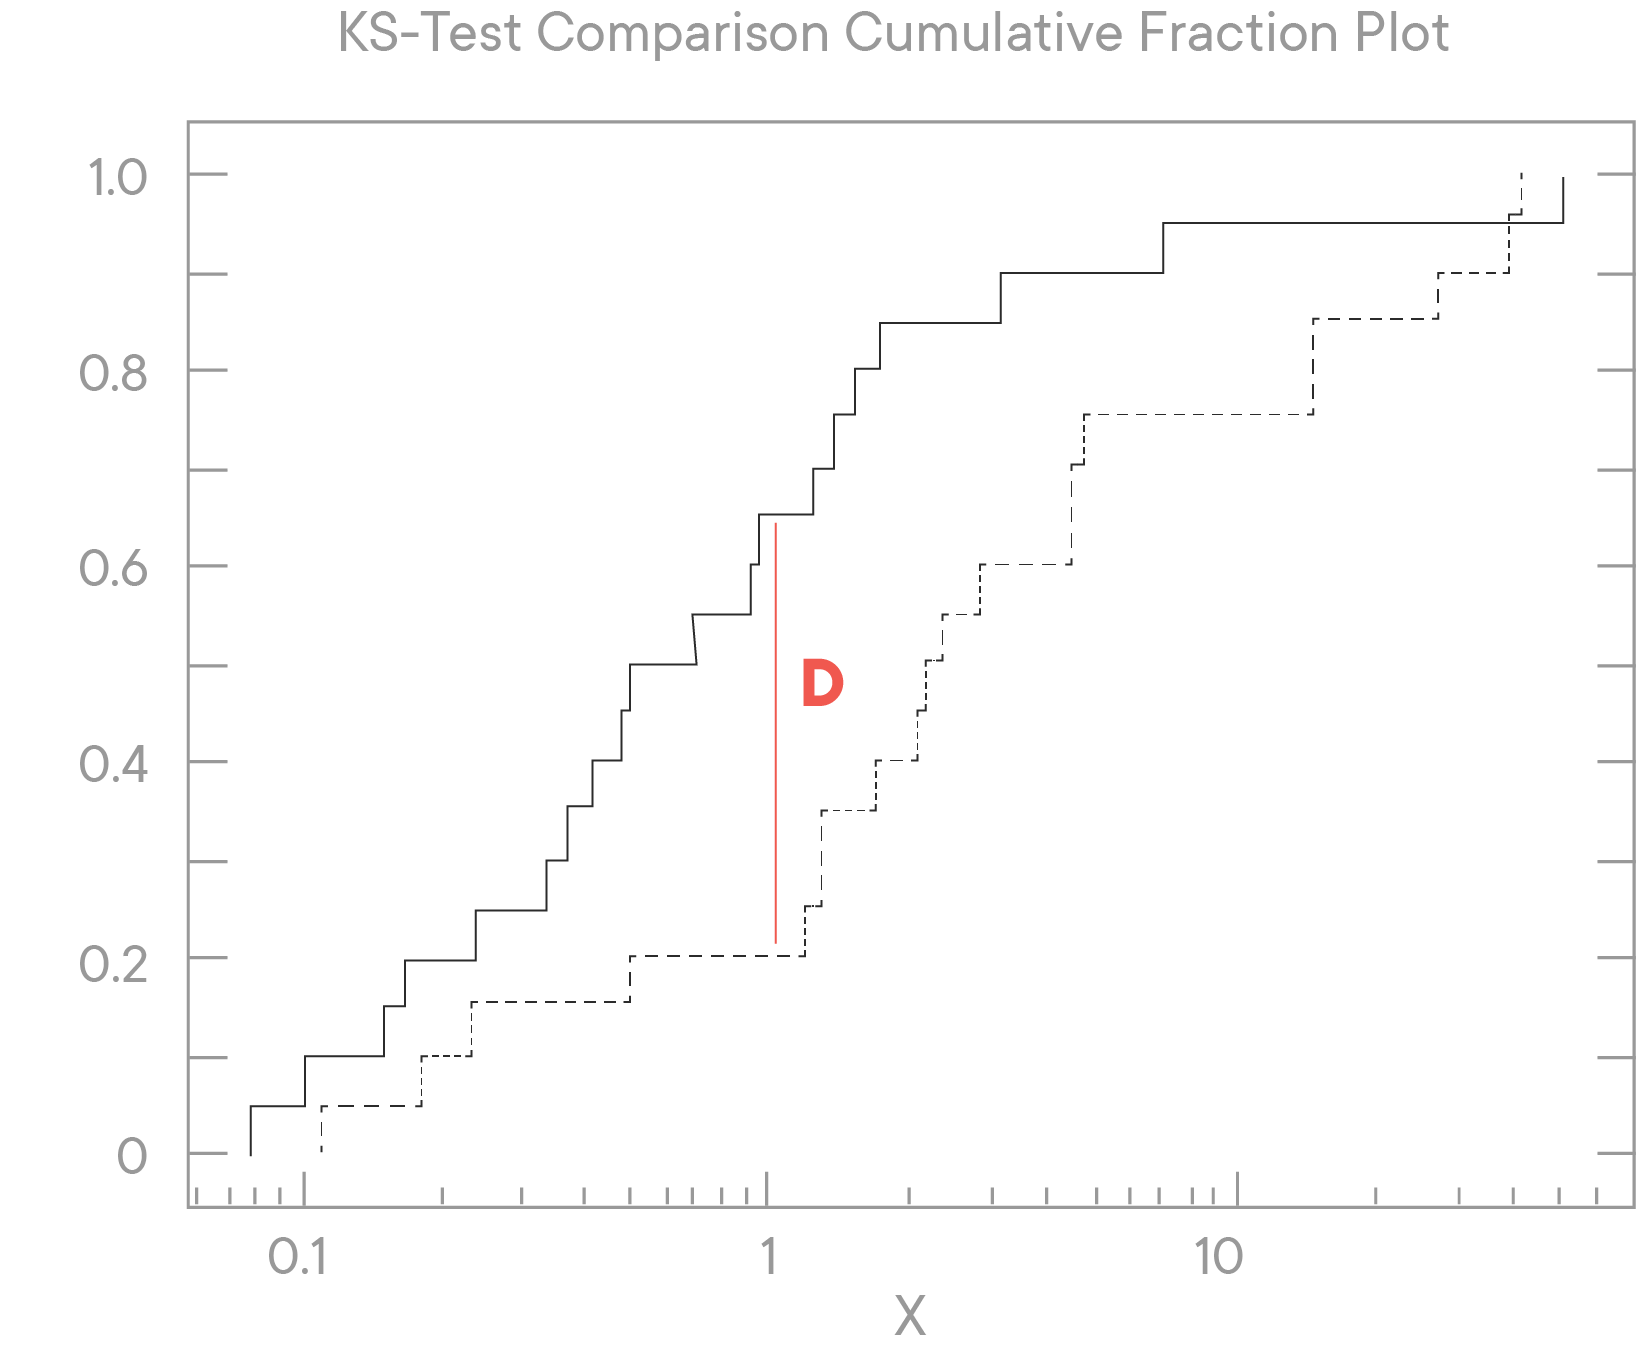

**Null Hypothesis:** There is no difference between the distribution of our sample and a normal distribution. 

**Acceptance Criteria:** If the calculated value is less than the critical value, accept the null hypothesis.

**Rejection Criteria:** If the calculated value is greater than the critical value, reject the null hypothesis.

## Examples
#### Problem Statement:

In a study done from various modules of a data science course with 60 students, equal number of students are samples from each module. These students are interviewed and their intention to join the advanced machine learning module was noted. Following shows how many students showed a positive intention

- Python (5) 
- Data Visualizations (9)
- SQL (11)
- Statistics (16)
- NLP (19)

It was expected that 12 students from each module would join advanced ML. 

Let's use K-S test to find if there is any difference among student classes with regard to their intention of joining the advanced machine learning module.

First, we need to set up our null hypothesis. 

> $H_{0}$: There is no difference among students of different modules with respect to their intention of joining advanced ML.

```
Streams	   No. of students interested in joining	FO(X)	Fr(X)	|FO(X)−FT(X)|
           Observed(O)	Theoretical(T)	 	 	 
Python	   5	        12	                        5/60	12/60	7/60
Viz.	   9	        12	                        14/60	24/60	10/60
SQL 	   11	        12	                        25/60	36/60	11/60
Stats	   16	        12	                        41/60	48/60	7/60
NLP 	   19	        12	                        60/40	60/60	60/60

Total	   n=60	 	
```

According to the formula above, 
$$
d	   =    	max(abs[F_0(X)-F_r(X)])
$$

$$ d = 11/60 = 0.183$$

Here's the Smirnov d-statistic for reference:\ 
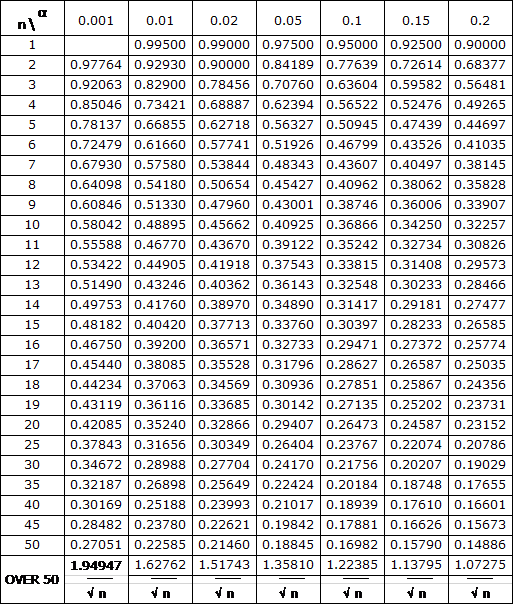

The table value of d at 5% significance level is given by
$${d (0.05) = \frac{1.36}{\sqrt{n}}} \\[7pt]
\, = \frac{1.36}{\sqrt{60}} \\[7pt]
\, = 0.175$$

Since the calculated d value (0.183) is greater than the critical value (0.175), hence we reject the null hypothesis and conclude that there is a difference among students of different modules in their intention of joining the advanced ML course. 


### Two-Sample K-S Test

The two-sample K-S test checks if two **independent** samples have been drawn from the same population, or, equivalently, from two identical populations (X = Y).

As with the one-sample test, it is moderately sensitive to all parameters of the distribution. The one-tailed version of this test has a specific purpose i.e .to test whether values of one population are larger than values of another population. Similar to one-sample test, cumulative distributions are compared, but here two sample distributions are compared instead of a sample distribution and a theoretical distribution as we saw above. For the two-tailed version of the test, the test statistic (d) is the largest absolute deviation between the two observed cumulative step functions, irrespective of the direction of the difference.

> The null hypothesis states for this test that there is no difference between the two distributions. The d-statistic is calculated in the same manner as we saw above.

$$d	   =    	max[abs[{F_{n1}(X)-F_{n2}(X)}]]$$

- n1 = Observations from first sample.

- n2 = Observations from second sample.

When the cumulative distribution shows large maximum deviation d, it is a reflection of the difference between the two sample distributions.

The critical value of d for samples where n1=n2 and is ≤ 40, the K-S table for two sample case is used. When n1 and/or n2 > 40 then the K-S table for large samples of two-sample test should be used. The null hypothesis is accepted if the calculated value is less than the table value and vice-versa.

Thus, the use of any of these nonparametric tests helps a researcher to test the significance of his results when the characteristics of the target population are unknown or no assumptions had been made about them.

### Example
Given two samples, test if their distributions are the same.

Compute the observed cumulative distribution functions of the two samples and compute their maximum difference.
```
X : 1.2, 1.4, 1.9, 3.7, 4.4, 4.8, 9.7, 17.3, 21.1, 28.4
Y : 5.6, 6.5, 6.6, 6.9, 9.2, 10.4, 10.6, 19.3
```
We sort the combined sample, in order to compute the empirical cdfs:
the combined sample, in order to compute the
empirical cdf’s:
```    
   1.2 1.4 1.9 3.7 4.4 4.8 5.6 6.5 6.6 6.9 9.2 9.7 10.4 10.6 17.3 19.3 21.1 28.4
Fx 0.1 0.2 0.3 0.4 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.7 0.7  0.7  0.8  0.8  0.9  1.0
Fy 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.2 0.4 0.5 0.6 0.6 0.8  0.9  0.9  1.0  1.0  1.0

```
\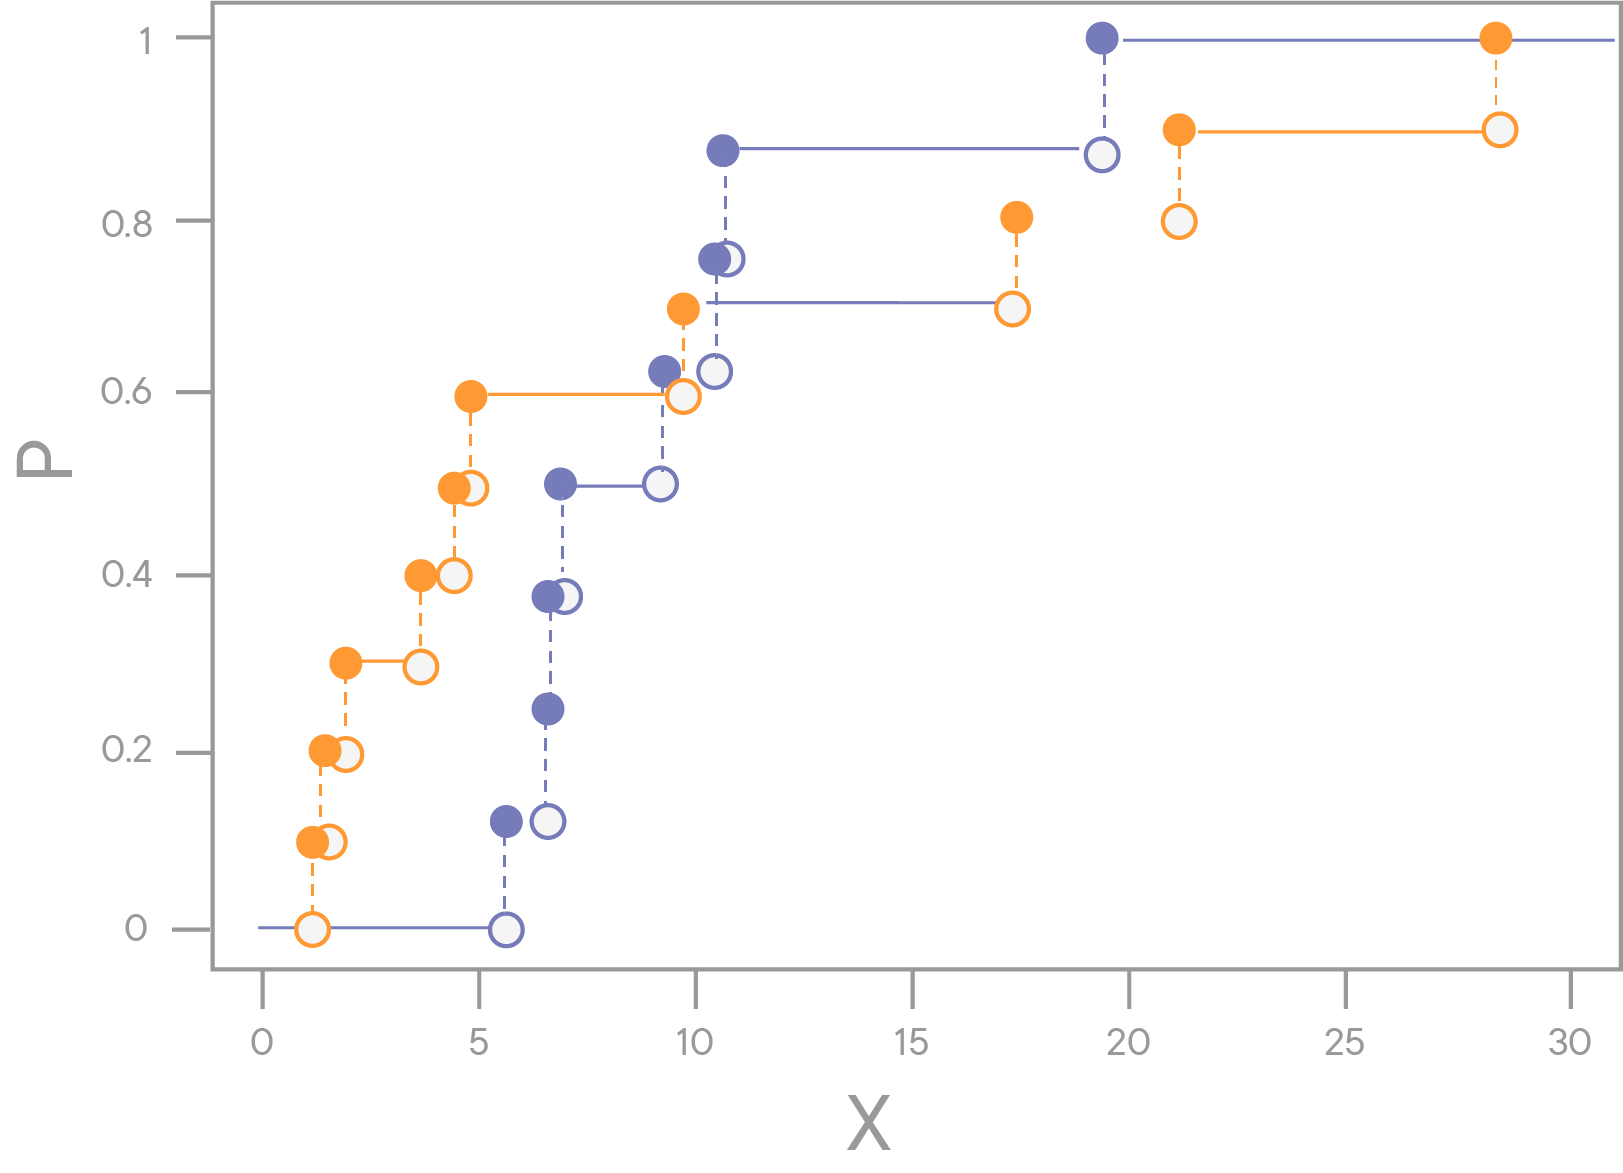\
The Kolmogorov-Smirnov statistic is again the maximum absolute difference of the two observed distribution functions. From the above image, and also by feeding above values in the given formula, we get **d = 0.6**.

For two samples, the 95% critical value can be approximated by
the formula:

$$d(0.05) = 1.36\sqrt{1/n_1 + 1/n_2} = 0.645$$

Since 0.6 < 0.645, we retain the null hypothesis in this case.

Kolmogorov-Smirnov tests have the advantages that:
- the distribution of statistic does not depend on cumulative distribution function being tested and  
- the test is exact  

They have the disadvantage that they are more sensitive to deviations near the center of the distribution than at the tails.

# LABS

# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10


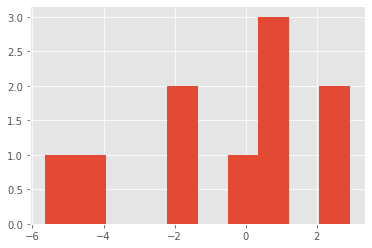

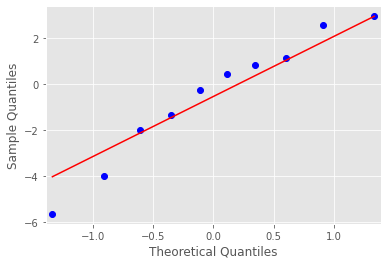

x_50


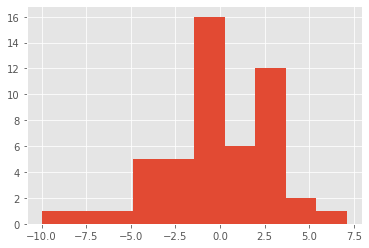

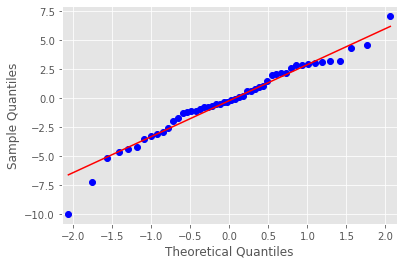

x_100


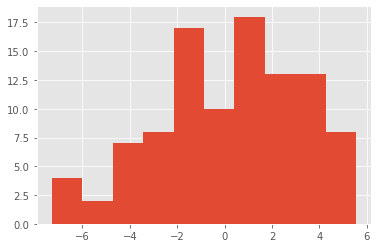

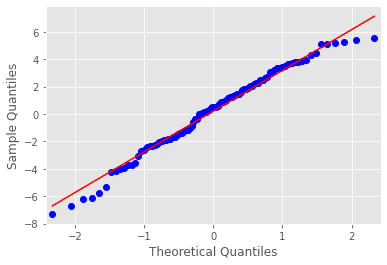

x_1000


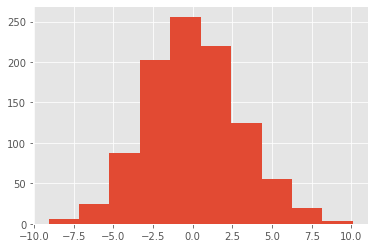

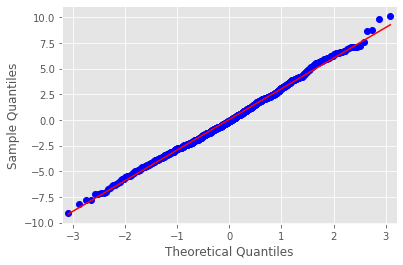

In [4]:
# Plot histograms and Q-Q plots for above datasets
labels = ['x_10','x_50','x_100','x_1000']
for ind, i in enumerate([x_10,x_50,x_100,x_1000]):
    print (labels[ind])
    plt.hist(i)
    sm.qqplot(i, line='s')
    plt.show()

In [5]:
# Your comments here 

# Histograms should not be used solely to detect normality directly
# Histograms are better to look for symmetry, skewness, and outliers 
# These can instead be used to get an indications of non-normality. 

# We see some outliers in our datasets
# no clear indications of non-normality for each plot.

# The Q-Q plot is a much better visualization of data as gives a reference to compare against  
# Shows a better picture about normality instead of relying on the histograms (or box plots).
# From Q-Q plot we can be more assured our data is normal - compared to non normality check in histogram

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

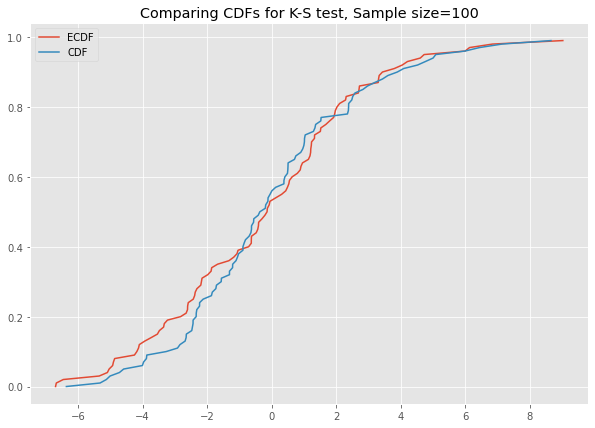

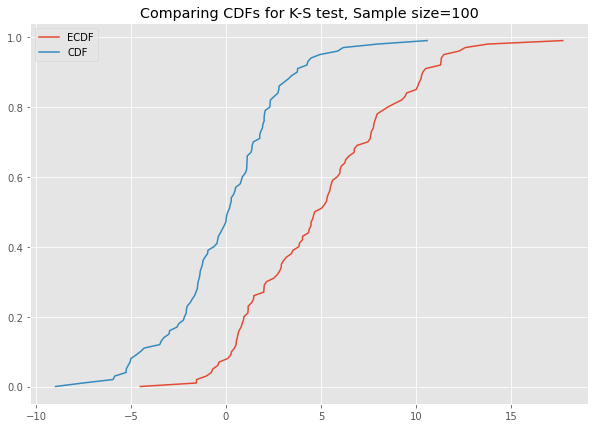

In [6]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for K-S test, Sample size=' + str(len(data)))
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

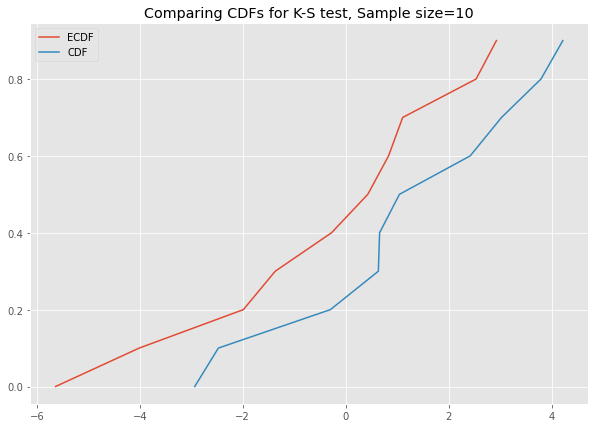

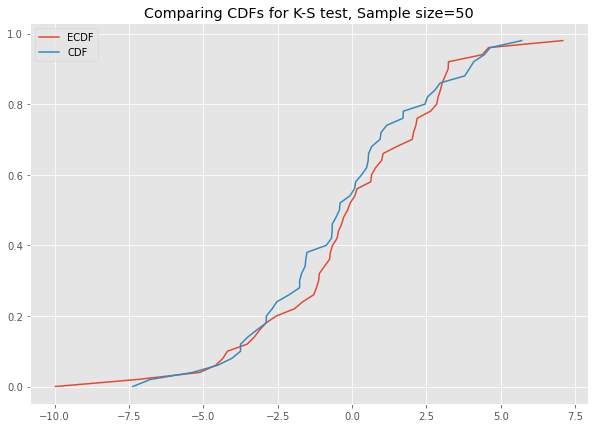

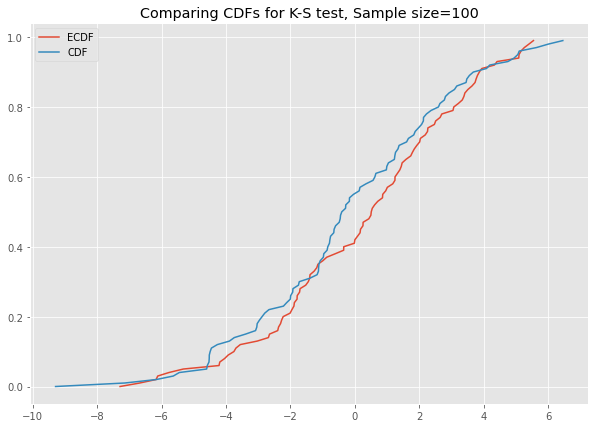

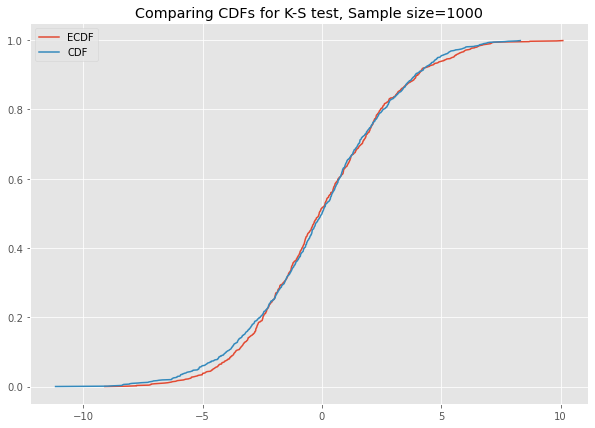

In [7]:
# Your code here 
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)

In [ ]:
# Your comments here 

# As we have more data values to compare, we get a better idea of normality
# Due to randomness in smaller sample sizes, it is very likely that the value of d would be high
# As our sample size goes from 50 to a 1000, we are in a much better position to comment on normality

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [9]:
# Perform K-S test 

# Your code here 
np.random.seed(999)
for i in [x_10, x_50, x_100, x_1000]:
    print (stats.kstest(i, 'norm', args=(0, 3)))
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.16450270423988078, pvalue=0.910553060075208)
KstestResult(statistic=0.08009630036526572, pvalue=0.8799834518920702)
KstestResult(statistic=0.08790375044391102, pvalue=0.39927648724148024)
KstestResult(statistic=0.02086042503659863, pvalue=0.7686728362782416)


In [ ]:
# Your comments here 
# The P-value in all cases is much greater than .05 
# We cannot reject the Null Hypothesis i.e. our sample is IDENTICAL to a normal distribution
# This is very intuitive as we started off with normal distributions

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [10]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0, 3)))
# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.022666444380263384, pvalue=0.6744225893674929)
KstestResult(statistic=0.5000726911533943, pvalue=9.01866500220475e-232)


In [11]:
# Your comments here 
# In the first case, the p-value is much larger than 0.05 so we cannot reject the Null Hypothesis 
# and conclude that our sample is a uniform distribution
# In the second case, comparing a uniform distribution against a normal CDF, the p value - 0 
# so we reject the Null Hypothesis with a high degree of confidence 

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

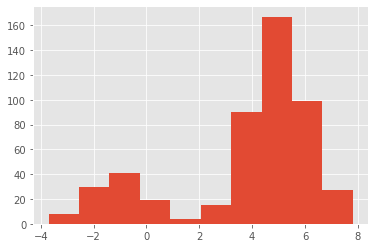

In [12]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

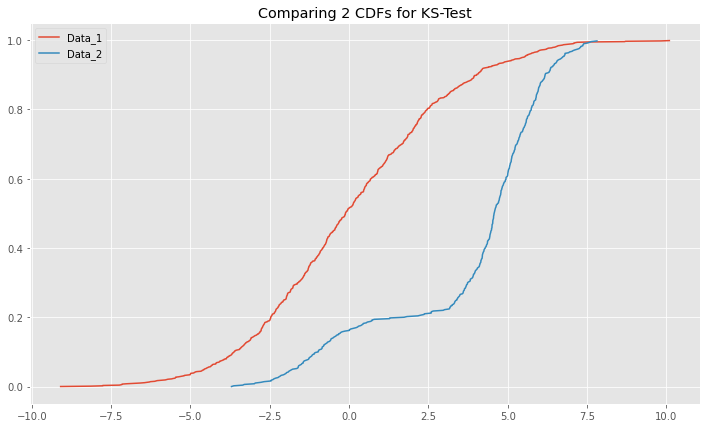

In [13]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')
    
ks_plot_2sample(x_1000, x_1000_bi[:,0])
# Uncomment below to run
# ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 

# x_1000 and x_1000_bi diverge a lot 
# We can expect a high value for the d statistic 

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [14]:
# Your code here
# Check if the distributions are equal
stats.ks_2samp(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.623, pvalue=1.7763568394002505e-15)

In [15]:
# Your comments here 
# A very small p-value, hence we reject the Null hypothesis
# The two samples belog to different distributions

## Summary